# Business Scenario

Write here a description of the problem we are trying the solve, the first assumption and the first scopes of possible solutions

# 0.0 IMPORTS

In [36]:
%pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.8 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

## 0.1 Functions

# 1.0 DATA DESCRIPTION

In [21]:
df1 = pd.read_csv(r'loan_data.csv').reset_index().rename(columns={'index':'id'})
df1.head().T

,0,1,2,3,4
id,0,1,2,3,4
credit.policy,1,1,1,1,1
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,0.1189,0.1071,0.1357,0.1008,0.1426
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.958333,2760.0,4710.0,2699.958333,4066.0
revol.bal,28854,33623,3511,33667,4740


## 1.1 Data Shape

In [22]:
print('Number of Rows:', df1.shape[0])
print('Number of Columns:', df1.shape[1])

Number of Rows: 9578
Number of Columns: 15


## 1.2 Rename Columns

In [23]:
# rename_the_columns_to_snake_case_format
df1.columns = [cols.replace('.','_') for cols in df1.columns]
df1.head()

,id,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 1.3 Data Types

In [24]:
df1.dtypes

id                     int64
credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

## 1.3 Check NaN

In [25]:
df1.isna().sum()/len(df1)

id                   0.0
credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

## 1.4 Describe Data

Describe data with NaN values

In [26]:
display(df1.describe())

,id,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,4788.500000,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,2765.074773,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2394.250000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,4788.500000,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,7182.750000,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,9577.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 2.0 FEATURE ENGINEERING

In [27]:
df2 = df1.copy()

# 3.0 EXPLORATORY DATA ANALYSIS

In [28]:
df3 = df2.copy()

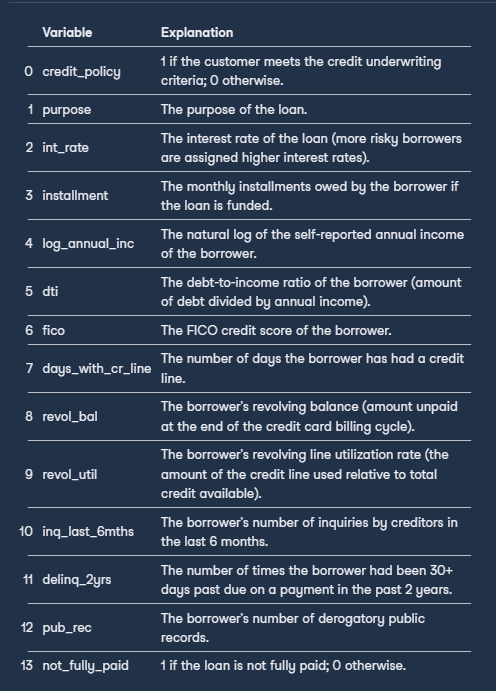

## 3.1 Hypotheses Testing

Hypotheses:

1. Customers who meet the credit underwriting criteria tend to default less.

### H1. Customers who meet the credit underwriting criteria tend to default less

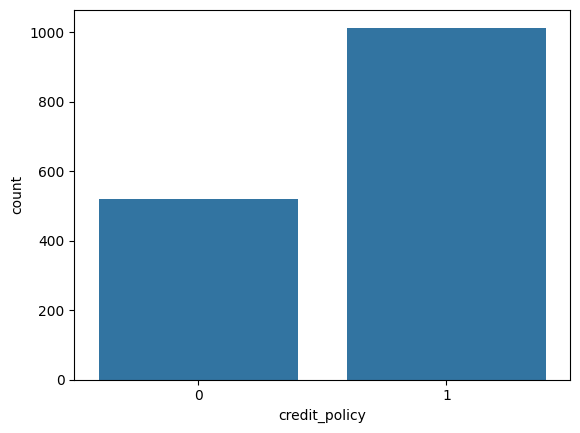

In [44]:
aux = df3[df3['not_fully_paid'] == 1]
ax = sns.countplot(data = aux, x = 'credit_policy')